# ECH 60 Spring 2022: HW 4

Rename this file as lastname_firstname and upload to canvas before 5pm Friday, May 13th.
<font color='red'> Total 4 points</font>. Partial points will be awarded ONLY IF a reasonable attempt has been made.

**PROBLEM 1:** We saw in quiz 3 that the maxima (or minima) of a function can be determined by supplying the derivative as input to a root-solving algorithm like Newton's method. What if the derivative is not easy to determine by hand? The following problem combines finite differences with root-finding algorithms to do this ...


The trajectory of a particle is given by $x(t)=\displaystyle\frac{\sin(t)}{4t^2-2}$. Find the point where the velocity $dx/dt$ is 0.005. Use central differences to create a function that gives the derivative of $x(t)$ and use `fsolve` on this function. Plot to see if your result makes sense.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

when velocity is .005 m/s the time is 4.71 seconds


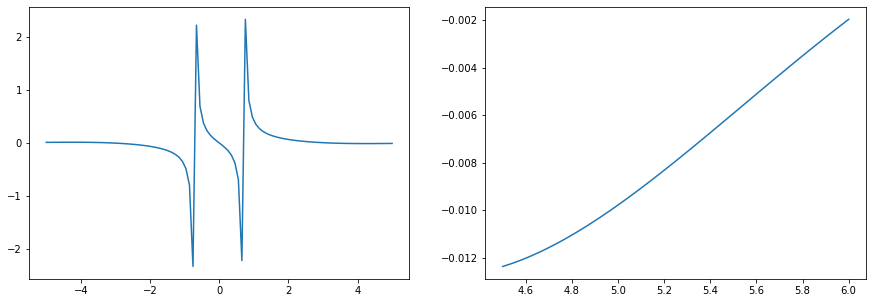

In [3]:
cen_dif=lambda x,h:((np.sin(x+h)/(4*(x+h)**2-2))-(np.sin(x-h)/(4*(x-h)**2-2)))/(2*h)-.005
dxdt=so.fsolve(cen_dif,1,1e-6)
print("when velocity is .005 m/s the time is %.2f"%dxdt,"seconds" )
t=np.linspace(-5,5,100)
t1=np.linspace(4.5,6,100)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t,((np.sin(t))/(4*t**2-2)))
plt.subplot(1,2,2)
plt.plot(t1,((np.sin(t1))/(4*t1**2-2)))
plt.show()

**PROBLEM 2:** The altitude of the space shuttle during the first two minutes of ascent is as follows. Find the velocity and acceleration as a function of time. Plot position, velocity and acceleration as 3 horizontal subplots.

$$\begin{matrix} {\rm t~(s)} &0 & 10 &20 &30 &40 &50 &60 &70 &80 &90 &100 &110 &120\\{\rm h~(m)} &-8&241&1244&2872&5377&8130&11617&15380&19872&25608&31412&38309&44726 \end{matrix}$$

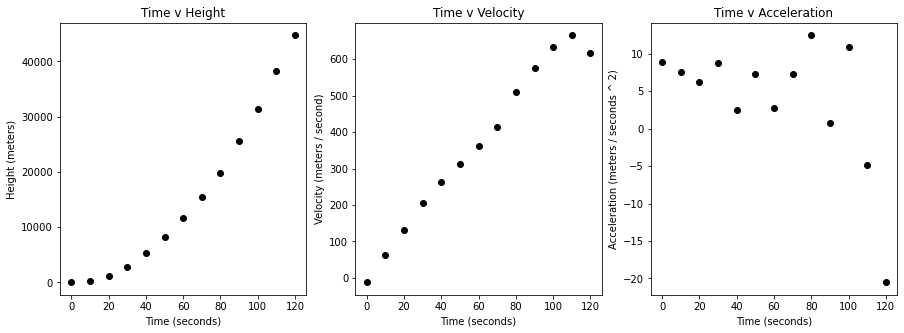

In [8]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,10,20,30,40,50,60,70,80,90,100,110,120])
x=np.array([-8,241,1244,2872,5377,8130,11617,15380,19872,25608,31412,38309,44726])
vel=data_deriv(x,t)
acc=data_deriv2(x,t)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.title("Time v Height")
plt.plot(t,x,'ko')

plt.subplot(1,3,2)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (meters / second)")
plt.title("Time v Velocity")
plt.plot(t,vel,'ko')

plt.subplot(1,3,3)
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (meters / seconds ^ 2)")
plt.title("Time v Acceleration")
plt.plot(t,acc,'ko')

plt.show()

In [6]:
def data_deriv(y,x):
    h=x[1]-x[0] # determine spacing
    dydx=np.zeros(y.shape) # initialize
    
    # first point
    dydx[0]=(-3*y[0]+4*y[1]-y[2])/(2*h)
    #last point
    dydx[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
    # all other points, vectorized
    dydx[1:-1]=(y[2:]-y[:-2])/(2*h)
    
    return dydx

def data_deriv2(y,x):
    h=x[1]-x[0]
    d2ydx2=np.zeros(y.shape) # initialize
    
    # first point
    d2ydx2[0]=(2*y[0]-5*y[1]+4*y[2]-y[3])/(h**2)
    #last point
    d2ydx2[-1]=(2*y[-1]-5*y[-2]+4*y[-3]-y[-4])/(h**2)
    # all other points, vectorized
    d2ydx2[1:-1]=(y[2:]-2*y[1:-1]+y[:-2])/(h**2)
    
    return d2ydx2

def func_deriv(f,a):
    
    # small number, smaller the better
    h=0.01
    
    # create neighboring data points at a+h and a-h
    f_front=f(a+h)
    f_back=f(a-h)
    
    dfdx=(f_front-f_back)/(2*h)
    
    return dfdx

*Rough work/test cells (won't be graded):*